# TP 3 Regression linéaire
Dans ce TP, nous aimerions prédire l'admission d'un étudiant à une specialité donnée selon ses notes dans deux matières.

Pour ce faire, nous étudierons un ensemble de données avec l'admission  (y) et les notes des deux modules (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df_students = pd.read_csv('data/students.csv')

In [4]:
df_students.head()

,mark1,mark2,admitted
0,6.9247,15.605,0
1,6.0573,8.779,0
2,7.1695,14.580,0
3,12.0370,17.262,1
4,15.8070,15.069,1


In [5]:
features = ['mark1', 'mark2']
target = 'admitted'

In [6]:
X = df_students[features].values
y = df_students[target].values.astype(np.int32)

In [7]:
X[:5]

array([[ 6.9247, 15.605 ],
       [ 6.0573,  8.779 ],
       [ 7.1695, 14.58  ],
       [12.037 , 17.262 ],
       [15.807 , 15.069 ]])

In [8]:
y[:5]

array([0, 0, 0, 1, 1])

In this dataset, the features represent the marks obtained by students on two subjects, and the target is the student being admitted to a major.

Let's reuse the functions we made on the previous notebook.

In [9]:
def add_theta_0(X):
  intercept = np.ones(len(X))
  X_stacked = np.vstack((intercept, X.T)).T
  return X_stacked

In [10]:
def h_theta(X,theta):
  """
  This is the predict(X) function that returns y_hat.
  """
  return np.sum(np.multiply(X,theta), axis=1)

In [11]:
def initialize_theta(n_features,is_random=True):
  """
  Returns bias (intercept) and weight for a vector X of n features in the form of a ndarray [theta_0,theta_1,..., theta_n].
  theta_0 being the bias, and the others the weights.
  n has to be greater or equal to 1.
  
  Parameters:
  n_features: number of features of X. If errors occur, reshape(-1,1) your vector.
  is_random: if set to False, will set values of bias and theta to zero.
  """
  if is_random:
    return np.random.rand(n_features) 
  else:
    return np.zeros(n_features)

In [12]:
def get_cost(X,y,theta):   
           
    # initialize J (the cost)
    J = 0 

    # Calculate h = X * theta 
    h = h_theta(X,theta)
    
    # Calculate the Cost J
    J = mean_squared_error(y,h)
    
    return J

# Descente du Gradient : Préparation des fonctions

0- Fonction mpgistique (Sigmoid)

In [13]:
def sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    pass
 

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [14]:
def mean_squared_error(y,h_theta):
  loss = h_theta - y
  m = len(y) 
  return 1/(2*m) * np.sum(loss ** 2)

In [15]:
import time
def gradient_descent(X, y, theta, num_iters=100, alpha=0.0001,verbose=False):
  """
  Parameters:
  X : training samples
  y : training labels
  num_iters : epoches of the algorithm to reach convergence
  alpha: step of the partial derivatives
  verbose : if set to True, will log the values of the cost and theta values.
  
  Returns theta updated values, cost_history and theta history.
  """
  start = time.time()
  # Number of training examples
  m = len(y)
                     
  # History of costs
  result_idx = 0
  gd_iterations_df = pd.DataFrame(columns=['iteration','cost']) 
  J_history = [] 
  theta_history = []
  
  for i in range(num_iters):
      # Step 1 : Calculate h = X * theta
      h = h_theta(X,theta)
      
      # Step 2 :Calculate the error = (h - y) 
      error = np.subtract(h, y)
      
      # Step 3 : Calculate the new theta
      theta_new = alpha * 1/m * np.sum(np.multiply(X.T, error), axis=1)
      
      # Step 4 : Update theta
      theta = np.subtract(theta, theta_new)
      
      # Step 5 : Compute the cost to keep history of it
      cost = get_cost(X,y,theta)
      
      gd_iterations_df.loc[result_idx]=[i,cost]
      result_idx += 1
      
      J_history.append(cost)
      theta_history.append(theta.tolist())
      
      if verbose:
          print('{}/{} [>==================]  - loss: {:.2f} - t_0: {:.4f} - t_1: {:.4f}'.format(i+1,num_iters,cost,theta[0],theta[1]))
          
  print('Time spent: %0.2fs' % (time.time()-start))  
  return theta, theta_history, J_history,gd_iterations_df
    

# Descente du Gradient : Appel des fonctions

In [16]:
X = add_theta_0(X)
X[:5]

array([[ 1.    ,  6.9247, 15.605 ],
       [ 1.    ,  6.0573,  8.779 ],
       [ 1.    ,  7.1695, 14.58  ],
       [ 1.    , 12.037 , 17.262 ],
       [ 1.    , 15.807 , 15.069 ]])

Initialisation de $\theta_0$ et $\theta_1$

In [21]:
theta = initialize_theta(X.shape[1],is_random=False)
theta

array([0., 0., 0.])

Calculer le cout initial

In [22]:
initial_cost = get_cost(X,y,theta)
initial_cost

0.3

Appel des la fonction de calcul du gradient

In [23]:
# paramètres
iterations = 1500
my_alpha = 0.000001

In [24]:
# Appel
theta, theta_history, J_history,gd_iterations_df = gradient_descent(X, y, theta, num_iters=iterations, alpha=my_alpha)

Time spent: 1.33s


In [26]:
theta

array([0.00067699, 0.01039716, 0.01024686])

In [25]:
gd_iterations_df

,iteration,cost
0,0.0,0.299841
1,1.0,0.299681
2,2.0,0.299522
3,3.0,0.299363
4,4.0,0.299204
...,...,...
1495,1495.0,0.154374
1496,1496.0,0.154320
1497,1497.0,0.154266
1498,1498.0,0.154213


Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [ ]:
def drawLine():
  pass
    

# Affichage 
Graphe representant les acceptations selon les caracteristiques

In [27]:
X[np.where(y==1),2]

array([[17.262 , 15.069 , 19.302 ,  9.3108, 17.484 ,  8.7067, 15.296 ,
        19.544 , 17.841 , 10.548 , 18.585 ,  9.5152, 13.16  , 13.794 ,
        13.991 ,  8.9643, 14.562 , 11.41  , 13.887 , 16.182 , 11.262 ,
        13.114 , 14.092 , 17.346 , 19.354 , 17.739 , 14.833 , 12.2   ,
         8.6781, 13.772 , 13.965 , 15.691 , 17.152 , 19.507 , 18.423 ,
        12.198 , 15.606 , 19.246 , 14.619 , 15.172 , 14.474 , 17.695 ,
        15.162 , 13.961 ,  9.1389, 13.318 , 11.903 , 18.192 , 17.119 ,
        18.085 , 19.329 , 15.432 , 17.502 , 16.969 ,  9.0717,  9.6761,
        17.421 , 13.755 , 12.986 , 17.906 ]])

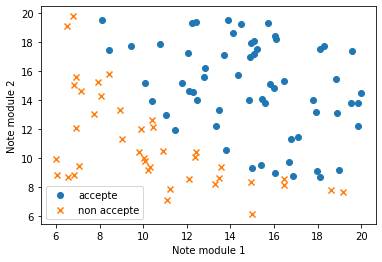

In [29]:
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')

plt.xlabel('Note module 1')
plt.ylabel('Note module 2')
plt.legend()

Traçage du coût en fonction de theta0 et theta1

Prédire des valeurs de y

In [74]:
# Predire pour des notes note1= 9 et note2=17


# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 25 Mars 2022 à 22h


In [ ]:
# bonne chance